In [8]:
%matplotlib notebook

from pynsia.pointcloud import Deepmap
import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd

<IPython.core.display.Javascript object>


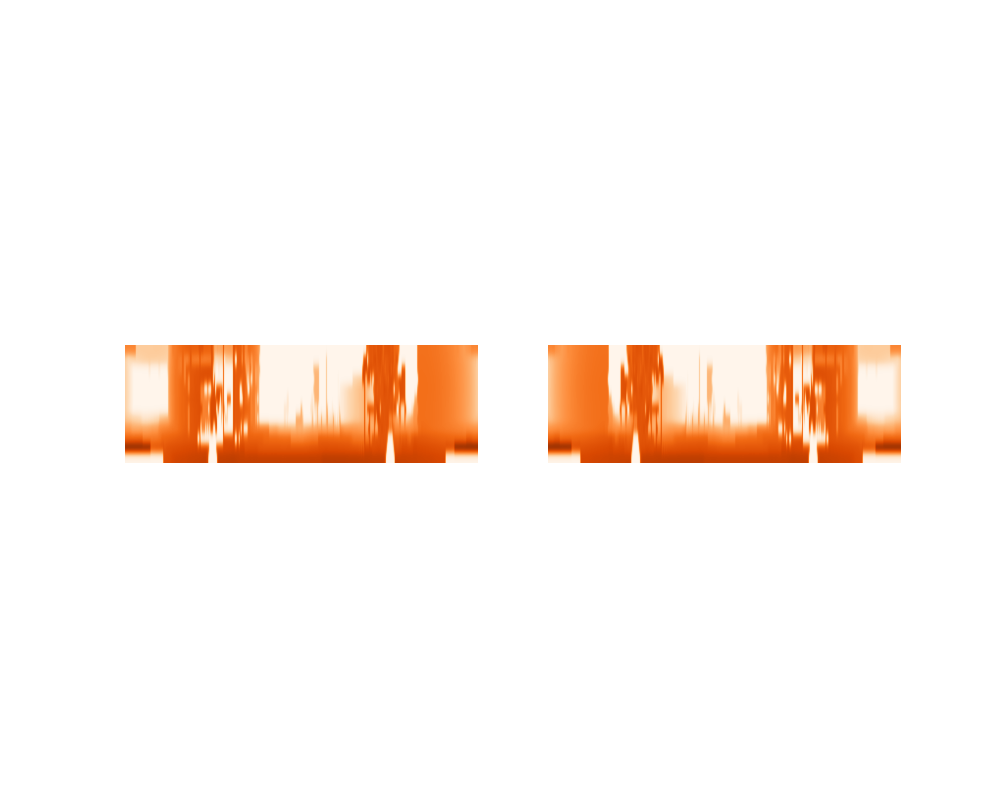

In [9]:
df1 = pd.read_csv('/home/blazaid/Projects/data-phd/curated/lc_miguel_validation_00000.csv')
df2 = pd.read_csv('/home/blazaid/Projects/data-phd/curated/lc_miguel_validation_00011.csv')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,8))
fig.show()

for (_, row1), (_, row2) in zip(df1.iterrows(), df2.iterrows()):
    dm1 = Deepmap.load(os.path.join('/home/blazaid/Projects/data-phd/curated', row1['Deepmap']))
    dm2 = Deepmap.load(os.path.join('/home/blazaid/Projects/data-phd/curated', row2['Deepmap']))

    ax1.clear()
    ax1.imshow(dm1.matrix, interpolation='gaussian', cmap='Oranges')
    ax1.set_aspect(10)
    ax1.set_axis_off()
    ax2.clear()
    ax2.imshow(dm2.matrix, interpolation='gaussian', cmap='Oranges')
    ax2.set_aspect(10)
    ax2.set_axis_off()
    fig.canvas.draw()